In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools
import random as random
import shutil

colors_ls = (list(mcolors.TABLEAU_COLORS)[:120])
colors_ls_cyc = itertools.cycle(list(mcolors.TABLEAU_COLORS)[:120])
markers_ls = ['o','s','v', '+', 'o', '*']
markers = itertools.cycle(markers_ls)

from scipy.special import psi
from scipy.special import polygamma
from scipy.special import erf, erfinv
from scipy.optimize import curve_fit

%matplotlib inline
mpl.style.use('classic')
mpl.style.use(['seaborn-whitegrid'])
from matplotlib.ticker import ScalarFormatter, NullFormatter
mpl.rcParams['figure.dpi'] = 400
mpl.rcParams.update({'font.size': 16})

current_dir = os.getcwd() 
kPSep = os.sep

import struct
FLOAT_SIZE = 8

In [22]:
Lx = 20
Ly = 1
d = 1
bc = 1

In [48]:
step = 0.1
J_max = 2.0
J_min = -2.0

J_s = np.arange(J_min, J_max+step, step).astype(np.float16)
J_s, len(J_s)

(array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
         1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ], dtype=float16),
 41)

In [50]:
df = pd.read_csv(f"classical/type=square,_BC={bc},dim={d},Ns={Lx*Ly},Lx={Lx},Ly={Ly},Lz=1.dat", sep = '\t', names = ['J1','J2','E_ferro', 'E_aferro','E_ed','E_aed', 'idx']).dropna(axis = 1)
df['difference'] = df['E_aferro'] - df['E_ferro']
print(df.dtypes)
df

J1            float64
J2            float64
E_ferro       float64
E_aferro      float64
E_ed          float64
E_aed         float64
difference    float64
dtype: object


,J1,J2,E_ferro,E_aferro,E_ed,E_aed,difference
0,-2.0,1.0,-38.000221,-38.005427,0.0,0.0,-0.005206
1,-1.8,-1.1,-34.194712,-34.198916,0.0,0.0,-0.004203
2,-1.8,-0.3,-34.199115,-34.196728,0.0,0.0,0.002386
3,-1.9,-1.8,-36.089622,-36.101782,0.0,0.0,-0.012159
4,-1.8,1.2,-34.196646,-34.197806,0.0,0.0,-0.001160
...,...,...,...,...,...,...,...
481,-1.0,0.5,-11.098754,-17.169503,0.0,0.0,-6.070749
482,-1.0,0.6,-18.994158,-18.991190,0.0,0.0,0.002968
483,-1.0,0.3,-18.992118,-15.109502,0.0,0.0,3.882616
484,-1.0,0.0,-16.993080,-4.994328,0.0,0.0,11.998751


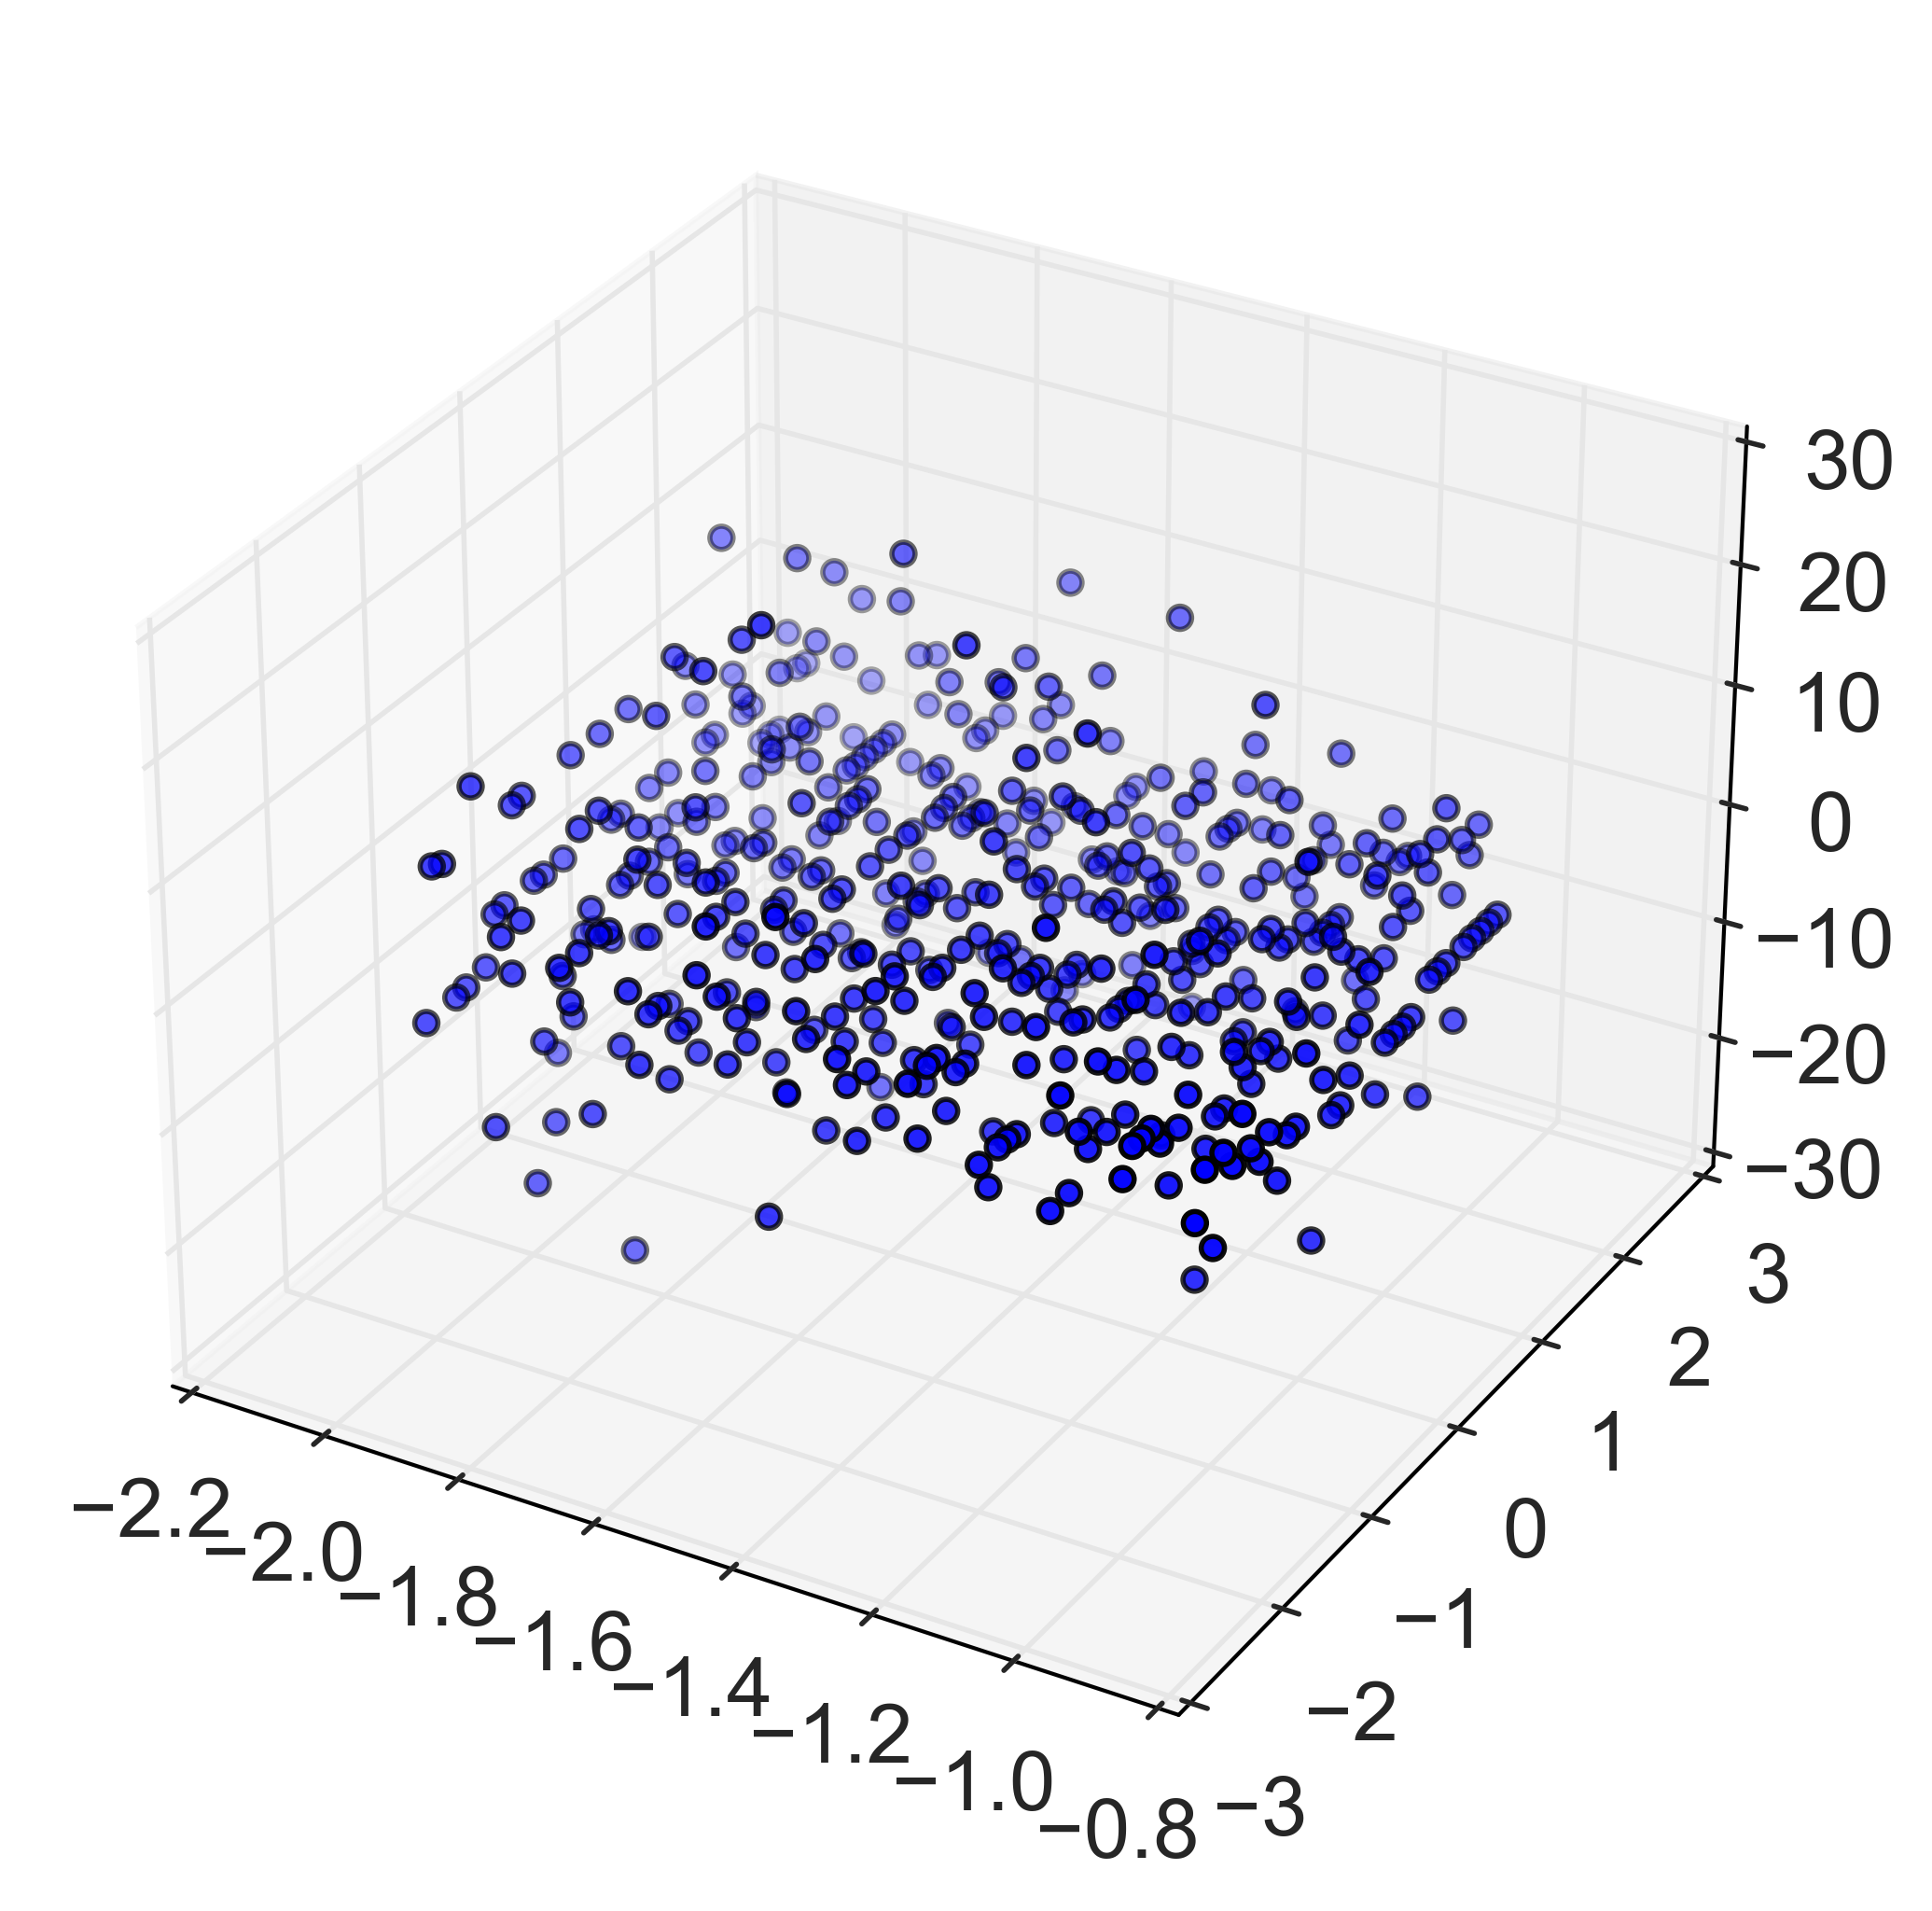

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = np.array(df['J1']).flatten()
y = np.array(df['J2']).flatten()
z = np.array(df['difference']).flatten()
ax.scatter3D(x,y,z)

In [51]:
tmp = df[['J1','J2','difference']].sort_values(['J2']).astype(np.float32)
print(tmp.dtypes)
tmp

J1            float32
J2            float32
difference    float32
dtype: object


,J1,J2,difference
247,-1.4,-2.0,2.802900
312,-1.2,-2.0,-2.354566
449,-0.9,-2.0,-1.796559
39,-1.8,-2.0,3.487767
349,-1.1,-2.0,-4.358188
...,...,...,...
431,-1.0,2.0,1.936768
60,-1.9,2.0,-0.144102
53,-2.0,2.0,-0.195835
239,-1.5,2.0,-2.912355


41 41 486
-2.0 -2.0 0
-0.005205830927998534
-2.0 -1.9 1
-0.004203396257899783
-2.0 -1.8 2
0.0023863876123968453
-2.0 -1.7 3
-0.012159383504801724
-2.0 -1.6 4
-0.001160045282894373
-2.0 -1.5 5
7.760027948591599
-2.0 -1.4 6
11.780881242170203
-2.0 -1.3 7
-4.018159807173504
-2.0 -1.2 8
-0.008613120345600578
-2.0 -1.1 9
-0.012324234122999655
-2.0 -1.0 10
-0.0005299451415012868
-2.0 -0.9 11
7.755773694523299
-2.0 -0.8 12
-0.04708105635909732
-2.0 -0.7 13
-0.006184614278396339
-2.0 -0.6 14
-0.012729579703304239
-2.0 -0.5 15
-0.0965023096485993
-2.0 -0.4 16
-0.019257655347203695
-2.0 -0.3 17
7.905117367114798
-2.0 -0.2 18
3.4552944992582013
-2.0 -0.1 19
-0.015571363520699322
-2.0 0.0 20
-3.512439274614504
-2.0 0.1 21
-0.08629908344130399
-2.0 0.2 22
3.6808039528254
-2.0 0.3 23
-3.3146527937092003
-2.0 0.4 24
-3.9328109257697967
-2.0 0.5 25
-3.8919981577328997
-2.0 0.6 26
-10.711547497401401
-2.0 0.7 27
-0.12218507200989848
-2.0 0.8 28
-0.012701787648801144
-2.0 0.9 29
7.491469113257196
-2.0 1

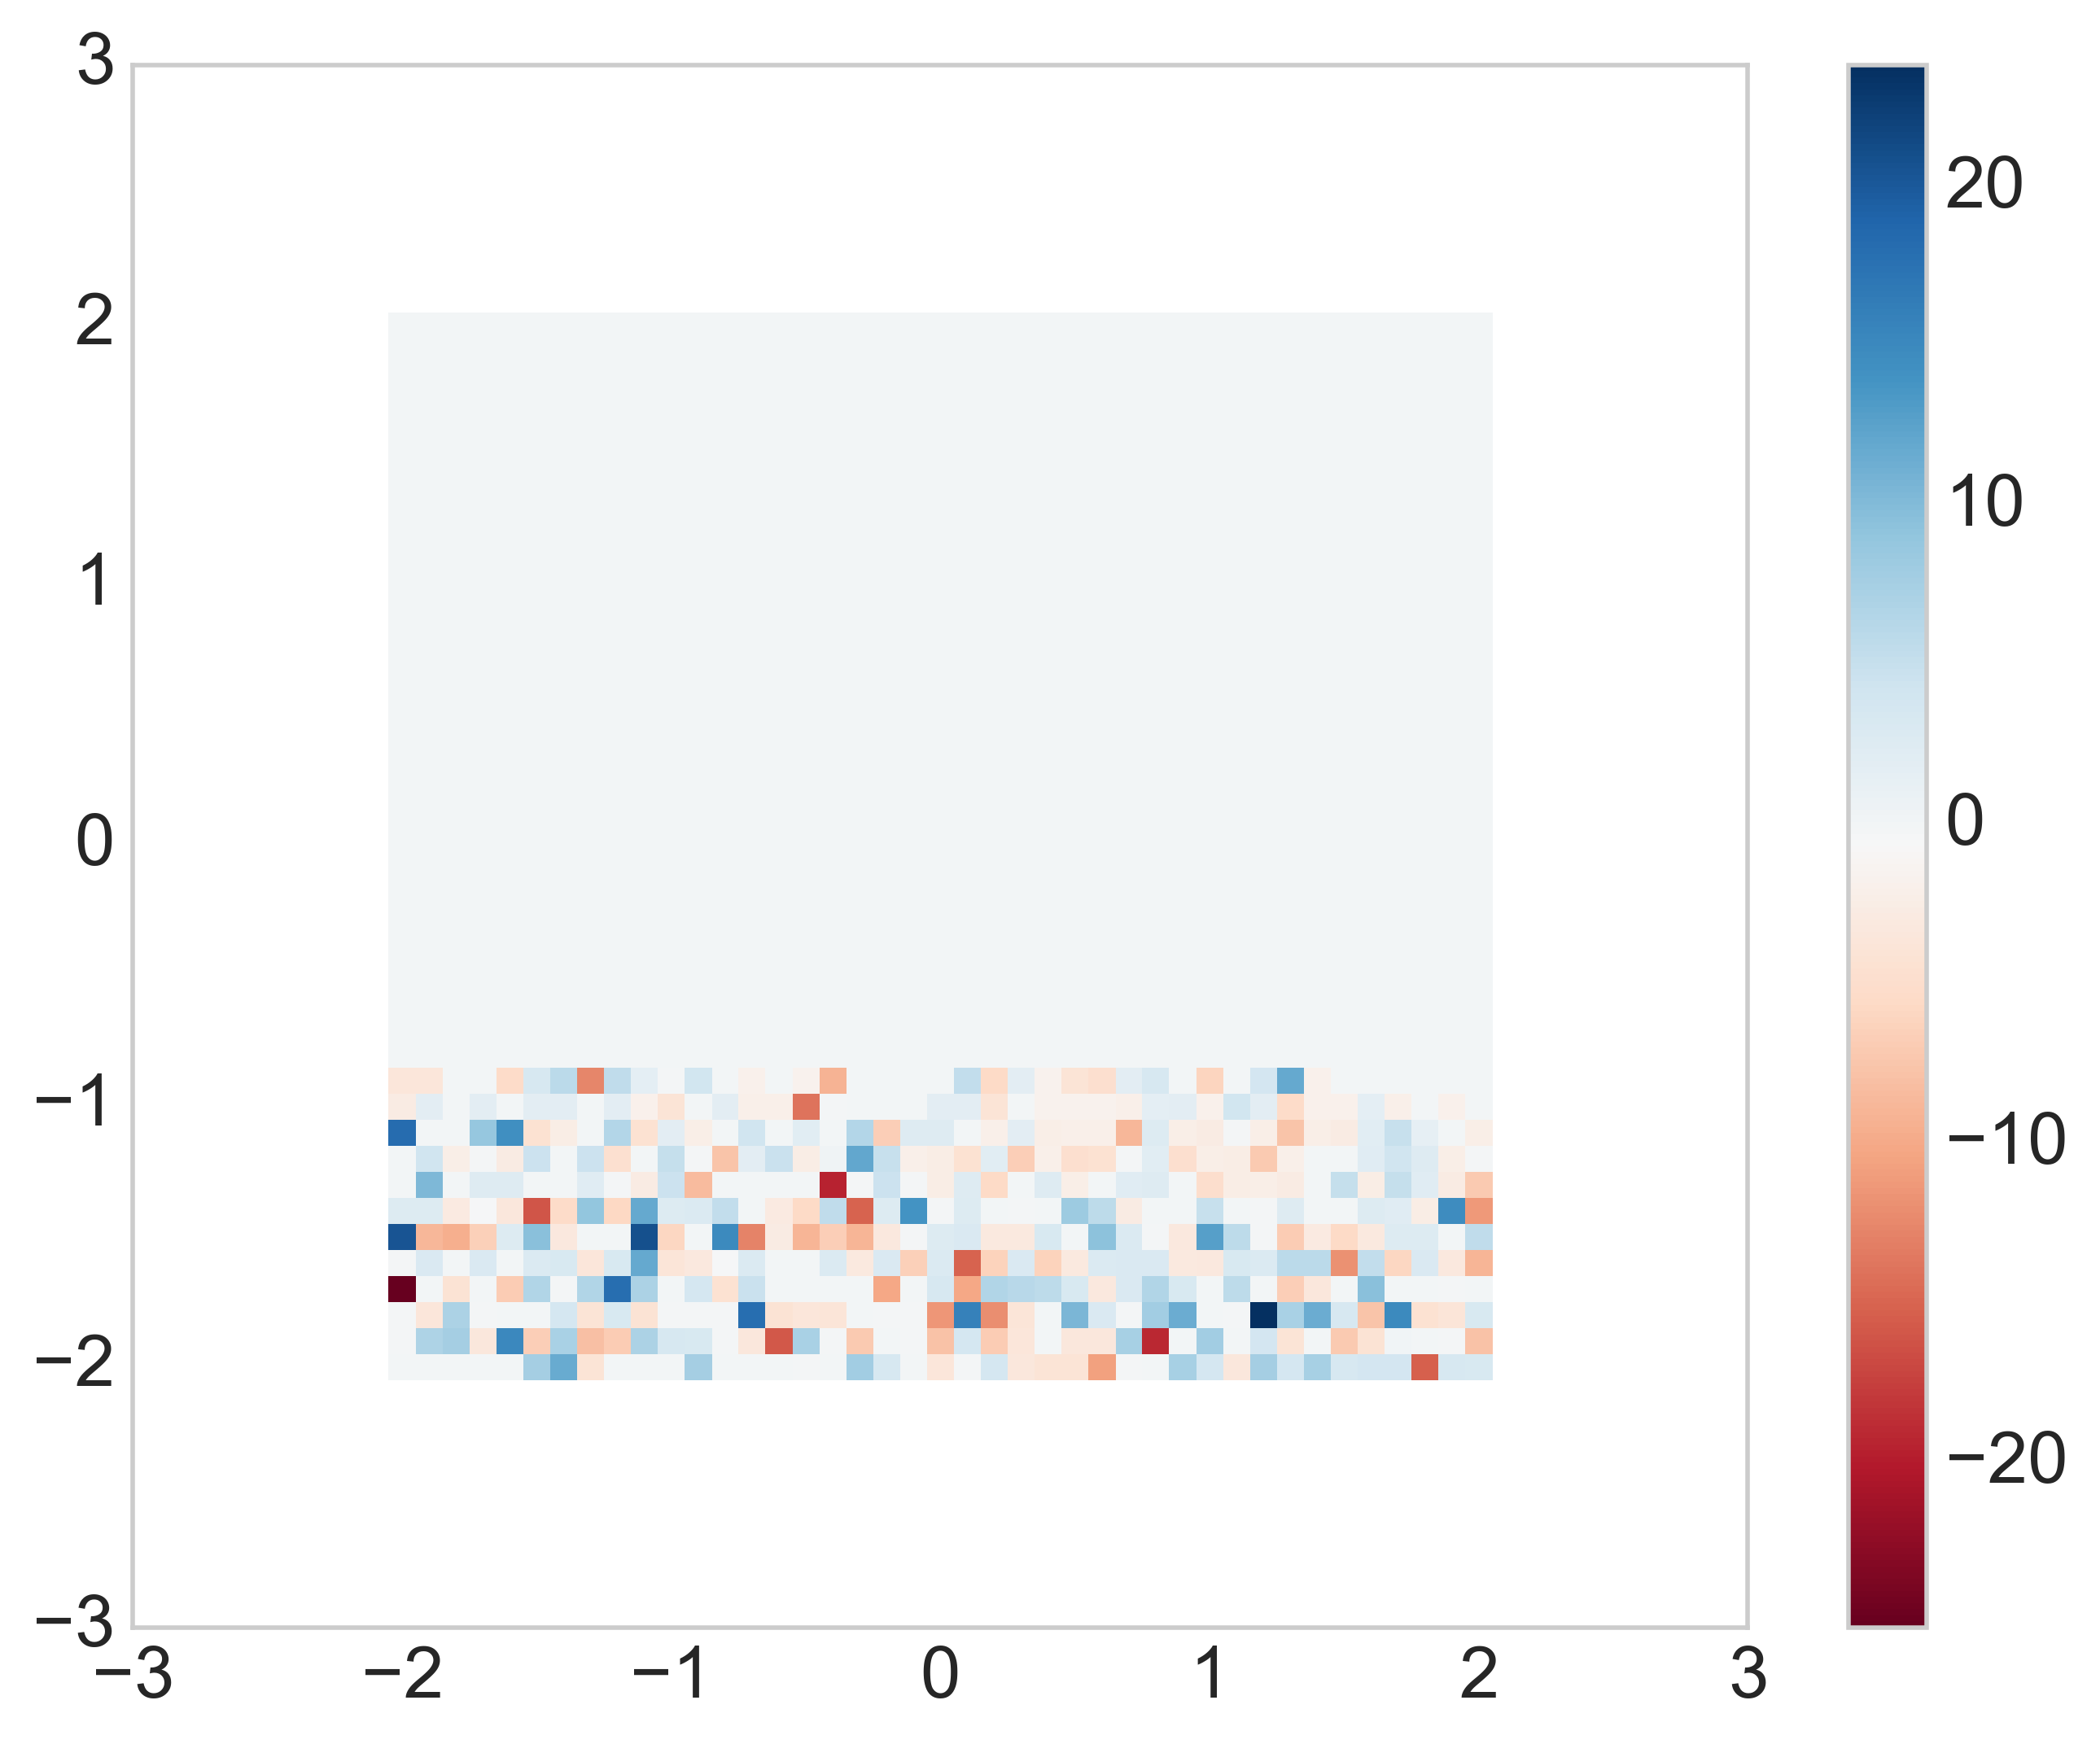

In [59]:
x, y = J_s, J_s
z = np.array(df['difference']).flatten()
print(len(x), len(y),len(z))

x_vals = list(np.array(df['J1']).flatten().astype(np.float16))
y_vals = list(np.array(df['J2']).flatten().astype(np.float16))
values = np.array(df['difference']).flatten().astype(float)
iterator = 0
#print(x_vals)
z = np.zeros((len(J_s), len(J_s)))
for i, vi in enumerate(J_s):
    for j, vj in enumerate(J_s):
        if vi in x_vals and vj in y_vals:
            print(vi, vj, iterator)
            
            val = values[iterator] if iterator < len(values) else 0
            iterator+=1
            z[i, j] = val
            print(val)

#z=z.reshape(len(x), len(y))
z_min, z_max = np.min(z), np.max(z)
fig, ax = plt.subplots()
print(len(z))
c = ax.pcolormesh(x,y,z, cmap='RdBu', vmin=z_min, vmax=z_max)
#c = ax.imshow(z)
#ax.set_xlim([np.min(x),np.max(x)])
#ax.set_ylim([np.min(y),np.max(y)])
fig.colorbar(c, ax=ax)
plt.show()